In [18]:
import sys
sys.path.append('../')

In [19]:
from data.get_data import get_data
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [20]:
batch_size = 10  # Kích thước batch
num_classes = 5  # 10 lớp
epochs = 10    # Số epoches

In [21]:
X, y = get_data()
y = to_categorical(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [22]:

model = Sequential()

# input shape
model.add(Dense(10, activation='relu', input_shape=(16,)))
# model.add(Dense(28, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                170       
                                                                 
 dense_5 (Dense)             (None, 5)                 55        
                                                                 
Total params: 225 (900.00 Byte)
Trainable params: 225 (900.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [24]:
H = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1, # log or not
)

Epoch 1/10
20113/20113 [==============================] - 31s 2ms/step - loss: 1.2433 - accuracy: 0.9486
Epoch 2/10
20113/20113 [==============================] - 25s 1ms/step - loss: 0.1873 - accuracy: 0.9577
Epoch 3/10
20113/20113 [==============================] - 13s 644us/step - loss: 0.1076 - accuracy: 0.9628
Epoch 4/10
20113/20113 [==============================] - 12s 605us/step - loss: 0.1021 - accuracy: 0.9645
Epoch 5/10
20113/20113 [==============================] - 12s 587us/step - loss: 0.0998 - accuracy: 0.9648
Epoch 6/10
20113/20113 [==============================] - 12s 607us/step - loss: 0.0996 - accuracy: 0.9650
Epoch 7/10
20113/20113 [==============================] - 12s 604us/step - loss: 0.1030 - accuracy: 0.9618
Epoch 8/10
20113/20113 [==============================] - 12s 598us/step - loss: 0.0974 - accuracy: 0.9632
Epoch 9/10
20113/20113 [==============================] - 14s 690us/step - loss: 0.1001 - accuracy: 0.9644
Epoch 10/10
20113/20113 [================

1572/1572 [==============================] - 1s 478us/step
+ precision = 0.623
+ recall = 0.551
+ f1_score = 0.560


/home/trhoan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


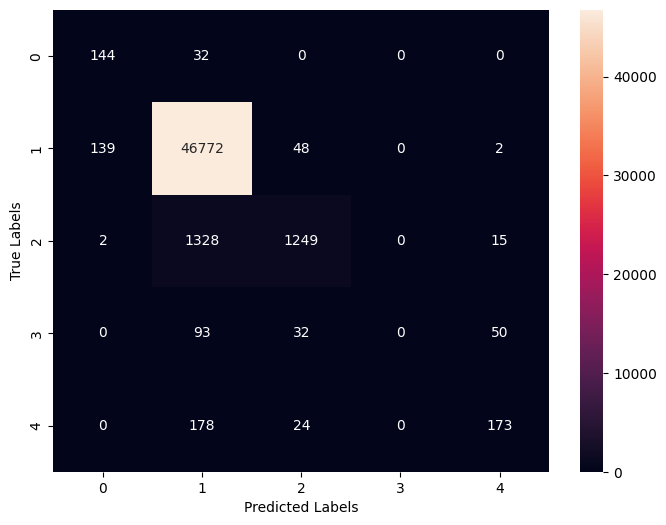

In [25]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred ,axis = 1)
y_true=np.argmax(y_test,axis = 1)
a = precision_recall_fscore_support(y_true, y_pred, average='macro')
cf = confusion_matrix(y_true,y_pred)

print(f'+ precision = {a[0]:.3f}')
print(f'+ recall = {a[1]:.3f}')
print(f'+ f1_score = {a[2]:.3f}')
plt.figure(figsize = (8,6))
ax = sns.heatmap(data=cf ,fmt="d",annot = True)
ax.set_xlabel("Predicted Labels")
ax.set_ylabel("True Labels")
plt.show()